## **Missing Data**

Today we will learn about the 
- Missing data
- How do they get generated?
- How to represent them?
- How to handle them?

So, let's code !

NaN,nan and NAN represents the missing values in Python. Also, note that they all are equivalent to each other.

In [1]:
# this is how we can import them
from numpy import NaN,nan,NAN

Few points that you should always remember using the NaN are :
- Missing values are different than other types of data, in that they don't really equal anything.
- The data is missing so there is no concept of equality.
- NaN is not be equivalent to 0 or an empty string, ' '.

In [2]:
# Let's test for equality 
print("NaN == True : ",NaN==True)
print("NaN == False : ",NaN==False)
print("NaN == 0 : ",NaN==0)
print("NaN == ' ' : ",NaN==' ')

NaN == True :  False
NaN == False :  False
NaN == 0 :  False
NaN == ' ' :  False


We can conclude that they don't really equal to any type of data

In [3]:
# Also, missing values are also not equal to other missing values
print("NaN == NaN : ",NaN==NaN)
print("NaN == nan : ",NaN==nan)
print("NaN == NAN : ",NaN==NAN)
print("NAN == nan : ",NAN==nan)

NaN == NaN :  False
NaN == nan :  False
NaN == NAN :  False
NAN == nan :  False


## **Checking for Missing Values**

Let's work on a dataset for better command

In [4]:
# Importing pandas for manipulating a dataset
import pandas as pd

In [5]:
# reading the csv file and creating a dataframe of the dataset
df = pd.read_csv(r"Data set\employees.csv")
# NaN is the default for the missing value in the dataset
df.head(15)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
6,Ruby,Female,8/17/1987,4:20 PM,65476,10.012,True,Product
7,NaN,Female,7/20/2015,10:43 AM,45906,11.598,NaN,Finance
8,Angela,Female,11/22/2005,6:29 AM,95570,18.523,True,Engineering
9,Frances,Female,8/8/2002,6:51 AM,139852,7.524,True,Business Development


In [6]:
# let's find the columns having missing values
df.isnull().any()

First Name            True
Gender                True
Start Date           False
Last Login Time      False
Salary               False
Bonus %              False
Senior Management     True
Team                  True
dtype: bool

We can notice that 4 columns 'First Name','Gender','Senior Management' and 'Team' are having missing values

In [7]:
# let me give you a trick how can you visualize where the missing value is in the dataset
# firstly import seaborn
import seaborn as sns

<AxesSubplot:>

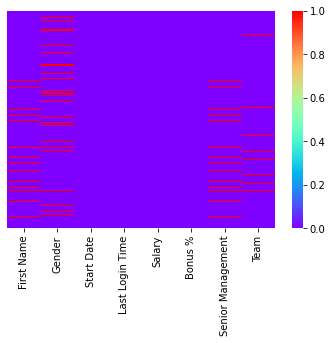

In [8]:
# creating a heatmap for the null values
sns.heatmap(df.isnull(),cmap='rainbow',yticklabels=False)

In [9]:
# if the keep_default_na is set to False, then the dataframe will be empty at that cell
df = pd.read_csv(r"Data set\employees.csv",keep_default_na=False)
df.head(15)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,true,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,true,
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,false,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,true,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,true,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,false,Legal
6,Ruby,Female,8/17/1987,4:20 PM,65476,10.012,true,Product
7,,Female,7/20/2015,10:43 AM,45906,11.598,,Finance
8,Angela,Female,11/22/2005,6:29 AM,95570,18.523,true,Engineering
9,Frances,Female,8/8/2002,6:51 AM,139852,7.524,true,Business Development


<AxesSubplot:>

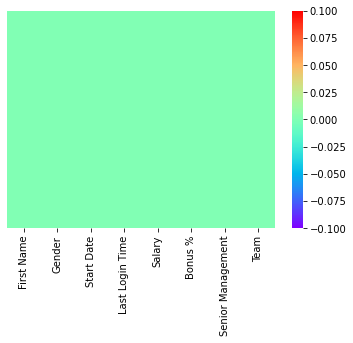

In [10]:
# Also, then our dataframe won't be able to recognise the NaN values and will show that there are not missing values in the dataset
sns.heatmap(df.isnull(),cmap='rainbow',yticklabels=False)

In [11]:
# We can manually specify the missing values by passing empty string to the na_values and it will recognise it as NaN value even when we have set the keep_default_na as False
df = pd.read_csv(r"Data set\employees.csv",na_values=[''],keep_default_na=False)
df.head(15)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
6,Ruby,Female,8/17/1987,4:20 PM,65476,10.012,True,Product
7,NaN,Female,7/20/2015,10:43 AM,45906,11.598,NaN,Finance
8,Angela,Female,11/22/2005,6:29 AM,95570,18.523,True,Engineering
9,Frances,Female,8/8/2002,6:51 AM,139852,7.524,True,Business Development


<AxesSubplot:>

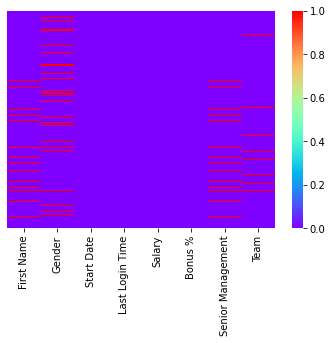

In [12]:
# Our dataset will also identify the missing values even when keep_default_na was false
sns.heatmap(df.isnull(),cmap='rainbow',yticklabels=False)

## **Finding and Counting the Missing Data**

In [13]:
# reading our dataset again
df = pd.read_csv(r"Data set\employees.csv")
df.head(10)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
6,Ruby,Female,8/17/1987,4:20 PM,65476,10.012,True,Product
7,NaN,Female,7/20/2015,10:43 AM,45906,11.598,NaN,Finance
8,Angela,Female,11/22/2005,6:29 AM,95570,18.523,True,Engineering
9,Frances,Female,8/8/2002,6:51 AM,139852,7.524,True,Business Development


Let's find and count the number of missing data

In [14]:
# counting the number of non-missing data
df.count()

First Name            933
Gender                855
Start Date           1000
Last Login Time      1000
Salary               1000
Bonus %              1000
Senior Management     933
Team                  957
dtype: int64

In [15]:
# counting the number of rows 
rows = df.shape[0]
rows

1000

In [16]:
# counting the number of missing values
missing_value = rows - df.count()
missing_value

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

## **Cleaning Missing Data**

#### **Recode / Replace**

We can use the fillna method to recode the missing values to another value

In [17]:
# Suppose if we want to replace the missing values as 'Not Known' 
df['First Name'] = df['First Name'].fillna('Not Known')

In [18]:
# The name of the 7th row is assigned to Not Known
df.head(10)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
6,Ruby,Female,8/17/1987,4:20 PM,65476,10.012,True,Product
7,Not Known,Female,7/20/2015,10:43 AM,45906,11.598,NaN,Finance
8,Angela,Female,11/22/2005,6:29 AM,95570,18.523,True,Engineering
9,Frances,Female,8/8/2002,6:51 AM,139852,7.524,True,Business Development


<AxesSubplot:>

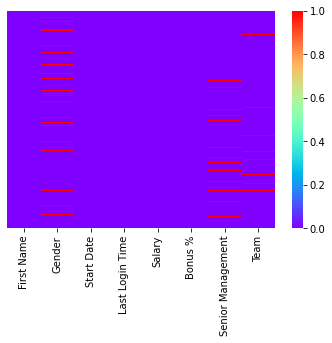

In [19]:
# we can notice that First Name column has no missing data
sns.heatmap(df.isnull(),cmap='rainbow',yticklabels=False)

#### **Fill Forward & Backward**

When we fill data forward the last known value is used for the next missing value in the column. In this way, the missing values are replaced with the last known/recorded value.

In [20]:
# reading another dataset named class-grades.csv
df = pd.read_csv(r"Data set\class-grades.csv")
df

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,30.00,63.15,48.89
3,7,81.22,96.06,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89
...,...,...,...,...,...,...
94,8,96.73,103.71,45.00,93.52,61.94
95,7,85.34,80.54,41.25,93.70,39.72
96,8,89.94,102.77,87.50,90.74,87.78
97,7,95.60,76.13,66.25,99.81,85.56


<AxesSubplot:>

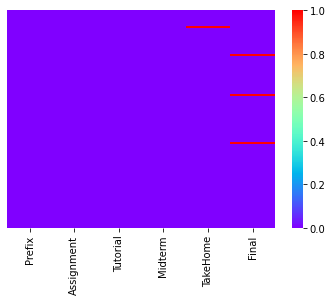

In [21]:
# plotting the heat map
sns.heatmap(df.isnull(),cmap='rainbow',yticklabels=False)

In [22]:
# let's use the fill forward method to fill the null values of 'TakeHome' 
df['TakeHome'] = df['TakeHome'].fillna(method='ffill')

The cells having the null values in the TakeHome column has been filled up with the previous cell value of that column

<AxesSubplot:>

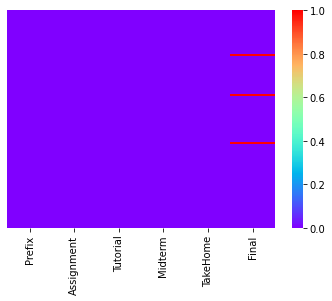

In [23]:
sns.heatmap(df.isnull(),cmap='rainbow',yticklabels=False)

In [24]:
# using the backward fill method to fill the null values of the 'Final' column
df['Final'] = df['Final'].fillna(method='bfill')

<AxesSubplot:>

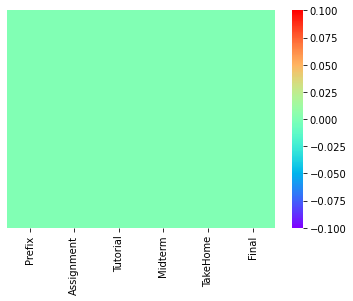

In [25]:
sns.heatmap(df.isnull(),cmap='rainbow',yticklabels=False)

Missing values of 'Final' column has been filled up with the next value of the column

**Important Note :**
1. In Forward fill, if a column begins with a missing value then that data will remain missing because there is no previous value to fill in.
2. In Backward fill, if a column ends with a missing value then it will remain missing because there is no new value to fill in.

#### **Drop Missing Values**

In [26]:
# reading the dataset named class-grades.csv
df = pd.read_csv(r"Data set\class-grades.csv")
df

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,30.00,63.15,48.89
3,7,81.22,96.06,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89
...,...,...,...,...,...,...
94,8,96.73,103.71,45.00,93.52,61.94
95,7,85.34,80.54,41.25,93.70,39.72
96,8,89.94,102.77,87.50,90.74,87.78
97,7,95.60,76.13,66.25,99.81,85.56


In [27]:
# another solution is to drop the rows having missing values
df.shape

(99, 6)

In [30]:
# using the dropna function
df = df.dropna()

In [31]:
df.shape

(95, 6)

After dropping the rows with missing values, 95 rows remained out of 99

In [32]:
# reading the dataset named class-grades.csv
df = pd.read_csv(r"Data set\class-grades.csv")
df

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,30.00,63.15,48.89
3,7,81.22,96.06,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89
...,...,...,...,...,...,...
94,8,96.73,103.71,45.00,93.52,61.94
95,7,85.34,80.54,41.25,93.70,39.72
96,8,89.94,102.77,87.50,90.74,87.78
97,7,95.60,76.13,66.25,99.81,85.56
